In [397]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Gather the data

In [400]:
# The data was acquired from the World Bank Group website in which I downloaded the World Development Indicator
# My goal is to understand is what is the factor with the highest correlation to the GNI (Gross National Income)  per capita, ppp (Purchasing Power Parity). 
# To do so I will have to remove a closely related column of GNI per Capita, Atlas method. This is another way of calculatin the GNI and this would give a high correlation and skew my model later on
# The dataframe comes with the rows and columns inverted for what I intend to do. Therefore I will split the data frame into two, Europe and Latin America. And I will transpose the columns and rows

In [402]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1", on_bad_lines="skip")
#this csv file is encoded in a different style to the regular ".csv", therefore have to use the enconding "iso-8859-1". 
#There are anomalies reading the data as some lines merge with others, this is why I use "on_bad_lines" = "skip" to remove the lines that are longer than normal

# Assess

In [405]:
#Creating the two data frames

In [407]:
dfs = {category: data for category, data in df.groupby("Country Name")}

In [409]:
df_EU = dfs["Europe & Central Asia"]

In [411]:
df_LA = dfs["Latin America & the Caribbean (IDA & IBRD countries)"]

In [413]:
print(df_EU.shape) 
print(df_EU.info())

(53, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 52
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   53 non-null     object
 1   Country Code   53 non-null     object
 2   Series Name    53 non-null     object
 3   Series Code    53 non-null     object
 4   2014 [YR2014]  53 non-null     object
 5   2015 [YR2015]  53 non-null     object
 6   2016 [YR2016]  53 non-null     object
 7   2017 [YR2017]  53 non-null     object
 8   2018 [YR2018]  53 non-null     object
 9   2019 [YR2019]  53 non-null     object
 10  2020 [YR2020]  53 non-null     object
 11  2021 [YR2021]  53 non-null     object
 12  2022 [YR2022]  53 non-null     object
 13  2023 [YR2023]  53 non-null     object
dtypes: object(14)
memory usage: 6.2+ KB
None


In [415]:
print(df_LA.shape) 
print(df_LA.info())

(53, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 53 to 105
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   53 non-null     object
 1   Country Code   53 non-null     object
 2   Series Name    53 non-null     object
 3   Series Code    53 non-null     object
 4   2014 [YR2014]  53 non-null     object
 5   2015 [YR2015]  53 non-null     object
 6   2016 [YR2016]  53 non-null     object
 7   2017 [YR2017]  53 non-null     object
 8   2018 [YR2018]  53 non-null     object
 9   2019 [YR2019]  53 non-null     object
 10  2020 [YR2020]  53 non-null     object
 11  2021 [YR2021]  53 non-null     object
 12  2022 [YR2022]  53 non-null     object
 13  2023 [YR2023]  53 non-null     object
dtypes: object(14)
memory usage: 6.2+ KB
None


In [417]:
print(df_EU.describe())
print(df_LA.describe())

                 Country Name Country Code  \
count                      53           53   
unique                      1            1   
top     Europe & Central Asia          ECS   
freq                       53           53   

                                              Series Name  Series Code  \
count                                                  53           53   
unique                                                 53           53   
top     Adolescent fertility rate (births per 1,000 wo...  SP.ADO.TFRT   
freq                                                    1            1   

       2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018]  \
count             53            53            53            53            53   
unique            43            41            42            42            42   
top               ..            ..            ..            ..            ..   
freq              11            13            12            12            12  

### Transcribe the dataframes

In [420]:
#changing the columns for the rows
df_EU = df_EU.T

In [422]:
df_LA = df_LA.T

In [424]:
df_EU.head()

0   \
Country Name                               Europe & Central Asia   
Country Code                                                 ECS   
Series Name    Adolescent fertility rate (births per 1,000 wo...   
Series Code                                          SP.ADO.TFRT   
2014 [YR2014]                                   19.7948490870892   

                                                              1   \
Country Name                               Europe & Central Asia   
Country Code                                                 ECS   
Series Name    Agriculture, forestry, and fishing, value adde...   
Series Code                                       NV.AGR.TOTL.ZS   
2014 [YR2014]                                   2.12441551813671   

                                                              2   \
Country Name                               Europe & Central Asia   
Country Code                                                 ECS   
Series Name    Annual freshwater withdrawals, total (% of int...   
Series Code                                       ER.H2O.FWTL.ZS   
2014 [YR2014]                                   6.95498858309175   

                                                              3   \
Country Name                               Europe & Central Asia   
Country Code                                                 ECS   
Series Name    Births attended by skilled health staff (% of ...   
Series Code                                       SH.STA.BRTC.ZS   
2014 [YR2014]                                                 ..   

                                                              4   \
Country Name                               Europe & Central Asia   
Country Code                                                 ECS   
Series Name    Contraceptive prevalence, any method (% of mar...   
Series Code                                       SP.DYN.CONU.ZS   
2014 [YR2014]                                                 ..   

                                                              5   \
Country Name                               Europe & Central Asia   
Country Code                                                 ECS   
Series Name    Domestic credit provided by financial sector (...   
Series Code                                    FS.AST.DOMS.GD.ZS   
2014 [YR2014]                                                 ..   

                                                        6   \
Country Name                         Europe & Central Asia   
Country Code                                           ECS   
Series Name    Electric power consumption (kWh per capita)   
Series Code                              EG.USE.ELEC.KH.PC   
2014 [YR2014]                             5365.08821278088   

                                                         7   \
Country Name                          Europe & Central Asia   
Country Code                                            ECS   
Series Name    Energy use (kg of oil equivalent per capita)   
Series Code                               EG.USE.PCAP.KG.OE   
2014 [YR2014]                              3152.71273737606   

                                                     8   \
Country Name                      Europe & Central Asia   
Country Code                                        ECS   
Series Name    Exports of goods and services (% of GDP)   
Series Code                              NE.EXP.GNFS.ZS   
2014 [YR2014]                          40.7561927702652   

                                                           9   ...  \
Country Name                            Europe & Central Asia  ...   
Country Code                                              ECS  ...   
Series Name    External debt stocks, total (DOD, current US$)  ...   
Series Code                                    DT.DOD.DECT.CD  ...   
2014 [YR2014]                                              ..  ...   

                                                 43  \
Country Name             

In [426]:
#I am going to remove the first 2 rows and the fourth as they are not needed anymore
df_EU = df_EU.drop(index=["Country Name","Country Code","Series Code"])
df_LA = df_LA.drop(index = ["Country Name","Country Code","Series Code"])

In [428]:
# I am going to set the "Series Name" as the title of the columns
df_EU.columns = df_EU.iloc[0] 
df_EU = df_EU[1:].reset_index(drop=True)

In [430]:
df_LA.columns = df_LA.iloc[0] 
df_LA = df_LA[1:].reset_index(drop=True)

In [432]:
df_EU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 53 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   Adolescent fertility rate (births per 1,000 women ages 15-19)                10 non-null     object
 1   Agriculture, forestry, and fishing, value added (% of GDP)                   10 non-null     object
 2   Annual freshwater withdrawals, total (% of internal resources)               10 non-null     object
 3   Births attended by skilled health staff (% of total)                         10 non-null     object
 4   Contraceptive prevalence, any method (% of married women ages 15-49)         10 non-null     object
 5   Domestic credit provided by financial sector (% of GDP)                      10 non-null     object
 6   Electric power consumption (kWh per capita)          

In [434]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 53 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   Adolescent fertility rate (births per 1,000 women ages 15-19)                10 non-null     object
 1   Agriculture, forestry, and fishing, value added (% of GDP)                   10 non-null     object
 2   Annual freshwater withdrawals, total (% of internal resources)               10 non-null     object
 3   Births attended by skilled health staff (% of total)                         10 non-null     object
 4   Contraceptive prevalence, any method (% of married women ages 15-49)         10 non-null     object
 5   Domestic credit provided by financial sector (% of GDP)                      10 non-null     object
 6   Electric power consumption (kWh per capita)          

# Clean

## Removing rows or columns that may hinder the model

In [454]:
# As previously mentioned, I have to remove the "GNI per Capita, Atlas method" column and the others that are also the GNI as they are basically the same as my target and it would give false results when modeling
df_EU.drop(columns=["GNI per capita, Atlas method (current US$)", "GNI, Atlas method (current US$)", "GNI, PPP (current international $)"], inplace=True)

In [456]:
df_LA.drop(columns=["GNI per capita, Atlas method (current US$)", "GNI, Atlas method (current US$)", "GNI, PPP (current international $)"], inplace=True)

## Removing rows with non values

### Some of the values have been filled in with "..", have to change that

In [460]:
# For this I have to change the ".." to NaN and then set a value for them.
df_EU.replace("..", np.nan, inplace = True)
df_LA.replace("..", np.nan, inplace = True)

In [462]:
# I will fill the "NaN" values with the mean of each column to keep it simple
df_EU = df_EU.apply(pd.to_numeric, errors ="coerce")
df_EU.fillna(df_EU.mean(), inplace = True)

In [464]:
df_LA = df_LA.apply(pd.to_numeric, errors ="coerce")
df_LA.fillna(df_LA.mean(), inplace = True)

In [466]:
df_EU.isna().sum()

Series Name
Adolescent fertility rate (births per 1,000 women ages 15-19)                   0
Agriculture, forestry, and fishing, value added (% of GDP)                      0
Annual freshwater withdrawals, total (% of internal resources)                  0
Births attended by skilled health staff (% of total)                            0
Contraceptive prevalence, any method (% of married women ages 15-49)           10
Domestic credit provided by financial sector (% of GDP)                        10
Electric power consumption (kWh per capita)                                     0
Energy use (kg of oil equivalent per capita)                                    0
Exports of goods and services (% of GDP)                                        0
External debt stocks, total (DOD, current US$)                                 10
Fertility rate, total (births per woman)                                        0
Foreign direct investment, net inflows (BoP, current US$)                       0
Fore

In [468]:
df_LA.isna().sum()

Series Name
Adolescent fertility rate (births per 1,000 women ages 15-19)                   0
Agriculture, forestry, and fishing, value added (% of GDP)                      0
Annual freshwater withdrawals, total (% of internal resources)                  0
Births attended by skilled health staff (% of total)                            0
Contraceptive prevalence, any method (% of married women ages 15-49)           10
Domestic credit provided by financial sector (% of GDP)                        10
Electric power consumption (kWh per capita)                                     0
Energy use (kg of oil equivalent per capita)                                    0
Exports of goods and services (% of GDP)                                        0
External debt stocks, total (DOD, current US$)                                 10
Fertility rate, total (births per woman)                                        0
Foreign direct investment, net inflows (BoP, current US$)                       0
Fore

In [470]:
# The values remaining as "NaN" mean that no values was added to those columns, therefore we can remove those values before getting to the modeling part
df_EU = df_EU.dropna(axis=1, how = "all")
df_LA = df_LA.dropna(axis=1, how = "all")

In [472]:
print(df_EU.dtypes)
print(df_LA.dtypes)

Series Name
Adolescent fertility rate (births per 1,000 women ages 15-19)                  float64
Agriculture, forestry, and fishing, value added (% of GDP)                     float64
Annual freshwater withdrawals, total (% of internal resources)                 float64
Births attended by skilled health staff (% of total)                           float64
Electric power consumption (kWh per capita)                                    float64
Energy use (kg of oil equivalent per capita)                                   float64
Exports of goods and services (% of GDP)                                       float64
Fertility rate, total (births per woman)                                       float64
Foreign direct investment, net inflows (BoP, current US$)                      float64
Forest area (sq. km)                                                           float64
GDP (current US$)                                                              float64
GDP growth (annual %)          

# Analyze

## Correlation matrix

In [537]:
#doing a correlation matrix to see what columns are related to my target
correlation_matrix_EU = df_EU.corr()
correlation_matrix_LA = df_LA.corr()

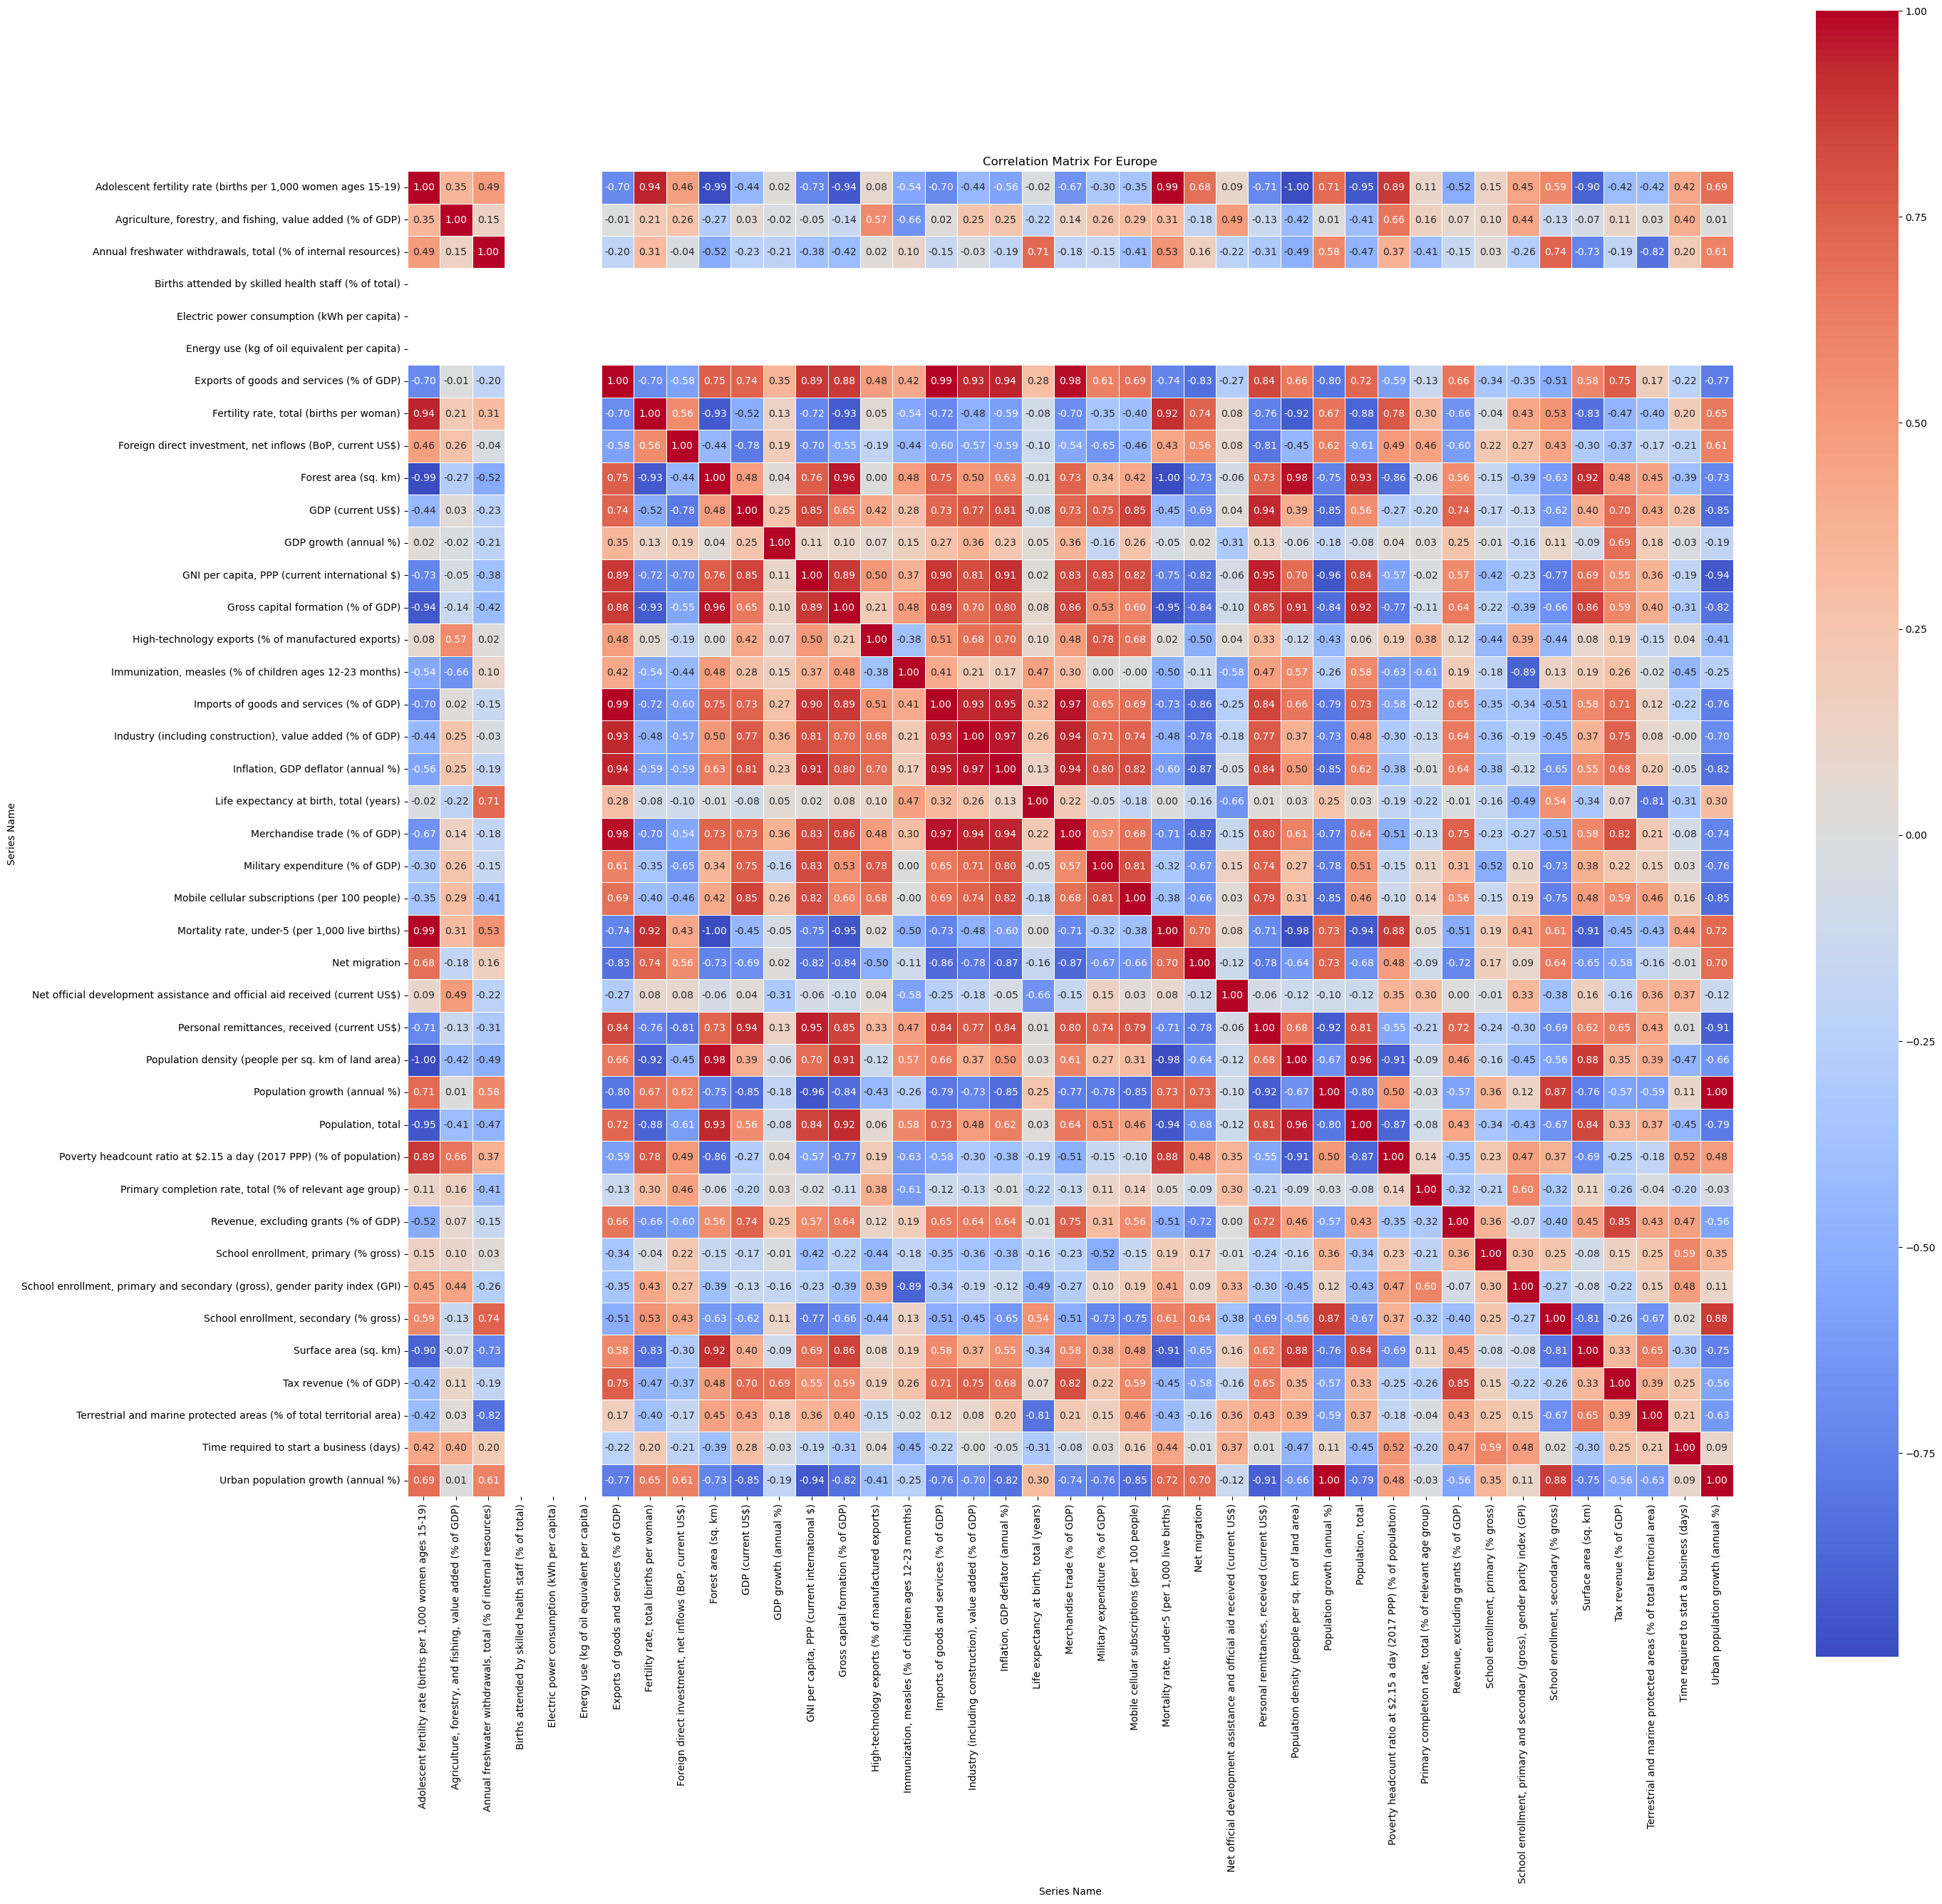

In [539]:
plt.figure(figsize = (30, 30)) 
sns.heatmap(correlation_matrix_EU, annot=True, cmap = "coolwarm", fmt = ".2f", linewidths =0.5, square = True)

# Add title and show the plot
plt.title("Correlation Matrix For Europe")
plt.show()

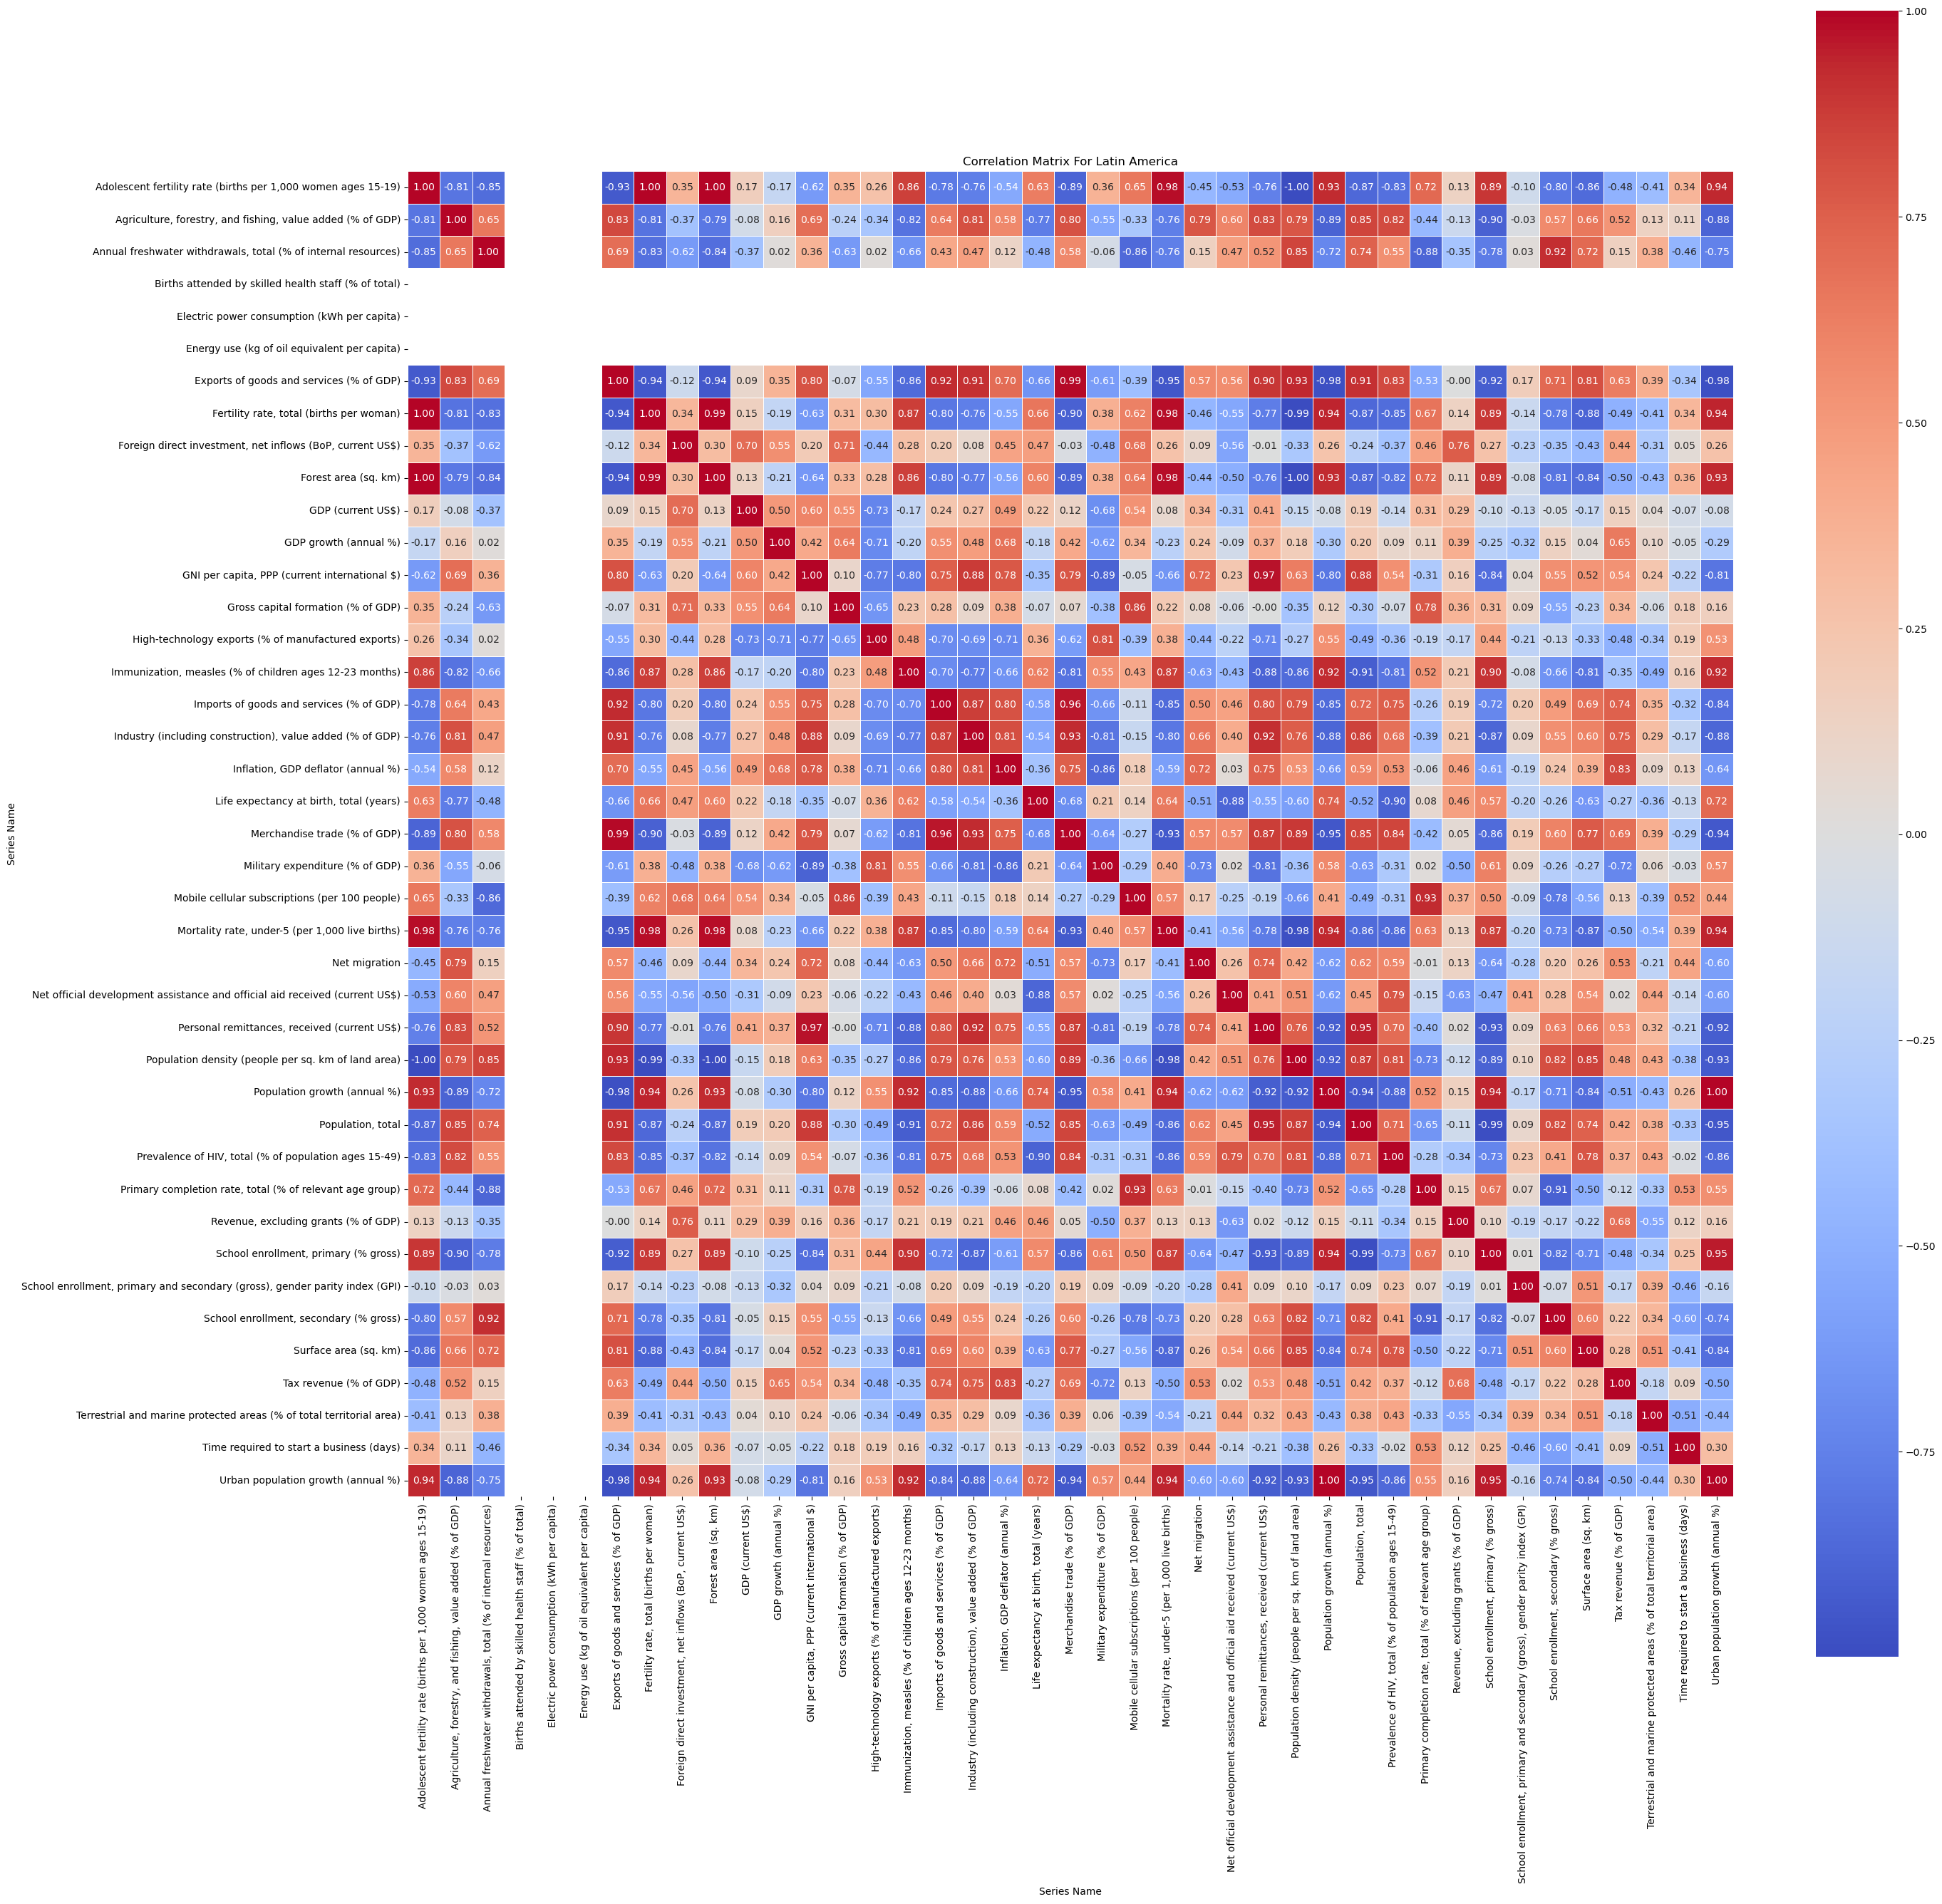

In [540]:
plt.figure(figsize = (30,30))  # Adjust size if needed
sns.heatmap(correlation_matrix_LA, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths =0.5, square = True)

# Add title and show the plot
plt.title("Correlation Matrix For Latin America")
plt.show()

## Looking at the data

In [544]:
# We see there are some high correlations between the GNI per capita and other columns. As this data has a high amount of columns and relation wise it has low amount of rows it can lead to some overfitting when testing

## Questions I have for this project

### What are the characteristics most influential towards the GNI per capita ? 

In [548]:
# It looks like the column with the highest influense is "Personal remitances" at a 0.95 or 0.97.
# It also looks like there is a negative correlation between the GNI per capita and the spending in the military when looking at the Lating america countries. 

### Are there any differences between developing countries and already developed countries ? 

In [551]:
# The data from EU countries shows that there are a lot more influential columns than the ones in Latin america

### What is most influential towards the GNI per capita, Import or Export ?

In [554]:
# It looks like the highest effect on GNI per capita is the personal remitances but between Import and Export for developing countries it is Export. For Developed countries (Europe) it is very similar but Import has a slight more effect

# Model

In [556]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

#train test split
X_EU = df_EU.drop("GNI per capita, PPP (current international $)", axis=1) 
y_EU = df_EU["GNI per capita, PPP (current international $)"]  

X_train_EU, X_test_EU, y_train_EU, y_test_EU = train_test_split(X_EU, y_EU, test_size=0.2, random_state=42)

In [558]:
# gradinet boost regressor
gb_model_EU = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_EU.fit(X_train_EU, y_train_EU)

# Step 3: Predict on the test set
y_pred_EU = gb_model_EU.predict(X_test_EU)

# Step 4: Evaluate the model
mse_EU = mean_squared_error(y_test_EU, y_pred_EU)
r2_EU = r2_score(y_test_EU, y_pred_EU)

print(f"Mean Squared Error for Europe model: {mse_EU}")
print(f"R² Score for Europe model: {r2_EU}")

Mean Squared Error for Europe model: 1998732.61634141
R² Score for Europe model: 0.9675409761570172


In [574]:
#train test split for Latin America
X_LA = df_LA.drop("GNI per capita, PPP (current international $)", axis=1) 
y_LA = df_LA["GNI per capita, PPP (current international $)"]  

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(X_LA, y_LA, test_size=0.2, random_state=42)

In [576]:
# gradinet boost regressor
gb_model_LA = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_LA.fit(X_train_LA, y_train_LA)

# Step 3: Predict on the test set
y_pred_LA = gb_model_LA.predict(X_test_LA)

# Step 4: Evaluate the model
mse_LA = mean_squared_error(y_test_LA, y_pred_LA)
r2_LA = r2_score(y_test_LA, y_pred_LA)

print(f"Mean Squared Error for Latin America model: {mse_LA}")
print(f"R² Score for Latin America model: {r2_LA}")

Mean Squared Error for Latin America model: 362483.6410773012
R² Score for Latin America model: 0.9470195819717997


# Visualize

## Predicted vs Actual values

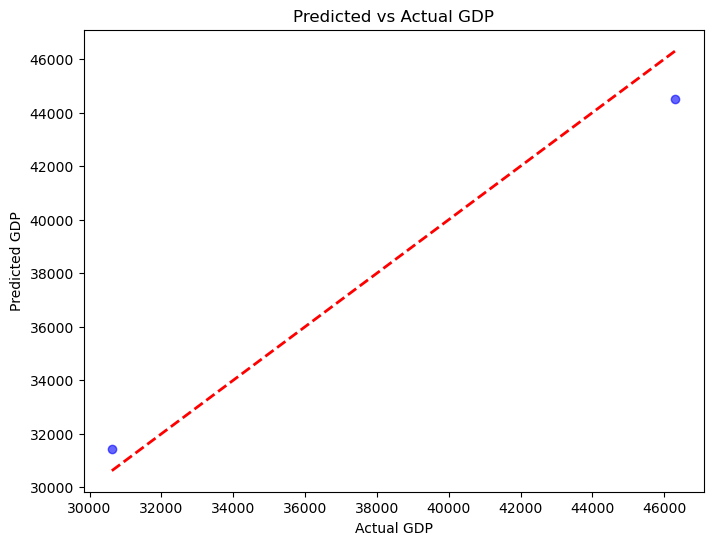

In [578]:
y_pred_EU = gb_model_EU.predict(X_test_EU)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_EU, y_pred_EU, alpha=0.6, color="blue")

plt.plot([min(y_test_EU), max(y_test_EU)], [min(y_test_EU), max(y_test_EU)], color="red", lw=2, linestyle="--")  # Diagonal line

plt.title("Predicted vs Actual GDP")
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")

plt.show()

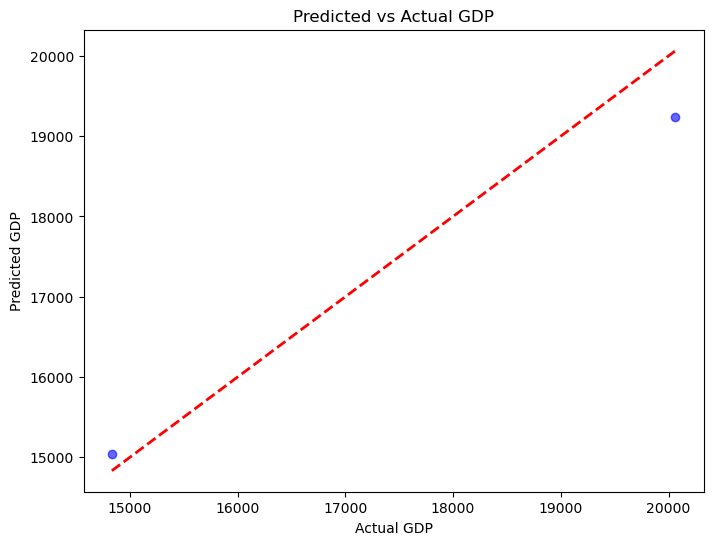

In [580]:
y_pred_LA = gb_model_LA.predict(X_test_LA)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_LA, y_pred_LA, alpha=0.6, color="blue")

plt.plot([min(y_test_LA), max(y_test_LA)], [min(y_test_LA), max(y_test_LA)], color="red", lw=2, linestyle="--")  # Diagonal line

plt.title("Predicted vs Actual GDP")
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")

plt.show()

## Residual Plot

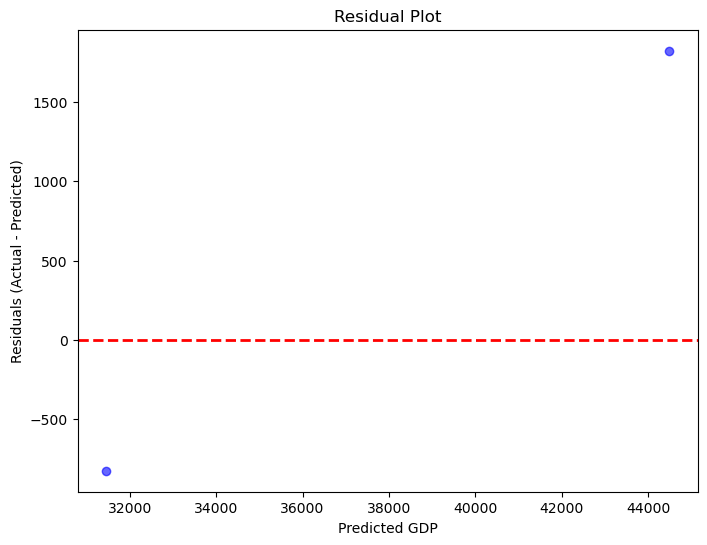

In [582]:
# This shows the difference between the two values of GDP gathered
res_EU = y_test_EU - y_pred_EU

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_EU, res_EU, alpha=0.6, color ="blue")

plt.axhline(y=0, color="red", linestyle = "--", lw=2)

plt.title("Residual Plot")
plt.xlabel("Predicted GDP")
plt.ylabel("Residuals (Actual - Predicted)")

plt.show()

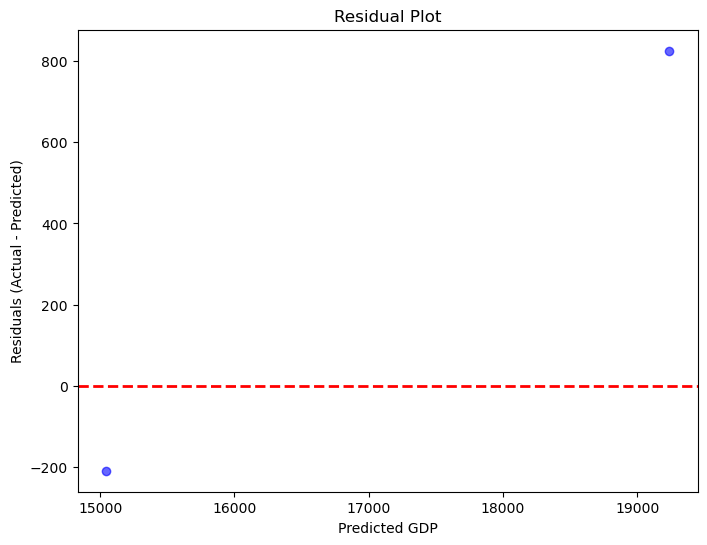

In [584]:
res_LA = y_test_LA - y_pred_LA

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_LA, res_LA, alpha=0.6, color ="blue")

plt.axhline(y=0, color="red", linestyle = "--", lw=2)

plt.title("Residual Plot")
plt.xlabel("Predicted GDP")
plt.ylabel("Residuals (Actual - Predicted)")

plt.show()

# Importance of each variable

                                              Feature    Importance
12                 Gross capital formation (% of GDP)  1.900459e-01
16  Industry (including construction), value added...  1.547655e-01
21     Mobile cellular subscriptions (per 100 people)  1.111094e-01
17                 Inflation, GDP deflator (annual %)  9.677401e-02
6            Exports of goods and services (% of GDP)  7.306623e-02
10                                  GDP (current US$)  6.075571e-02
39                 Urban population growth (annual %)  5.546936e-02
27                       Population growth (annual %)  5.148550e-02
9                                Forest area (sq. km)  4.489226e-02
28                                  Population, total  3.653631e-02
7            Fertility rate, total (births per woman)  2.757535e-02
29  Poverty headcount ratio at $2.15 a day (2017 P...  1.397702e-02
20                    Military expenditure (% of GDP)  1.338633e-02
23                                      Net migr

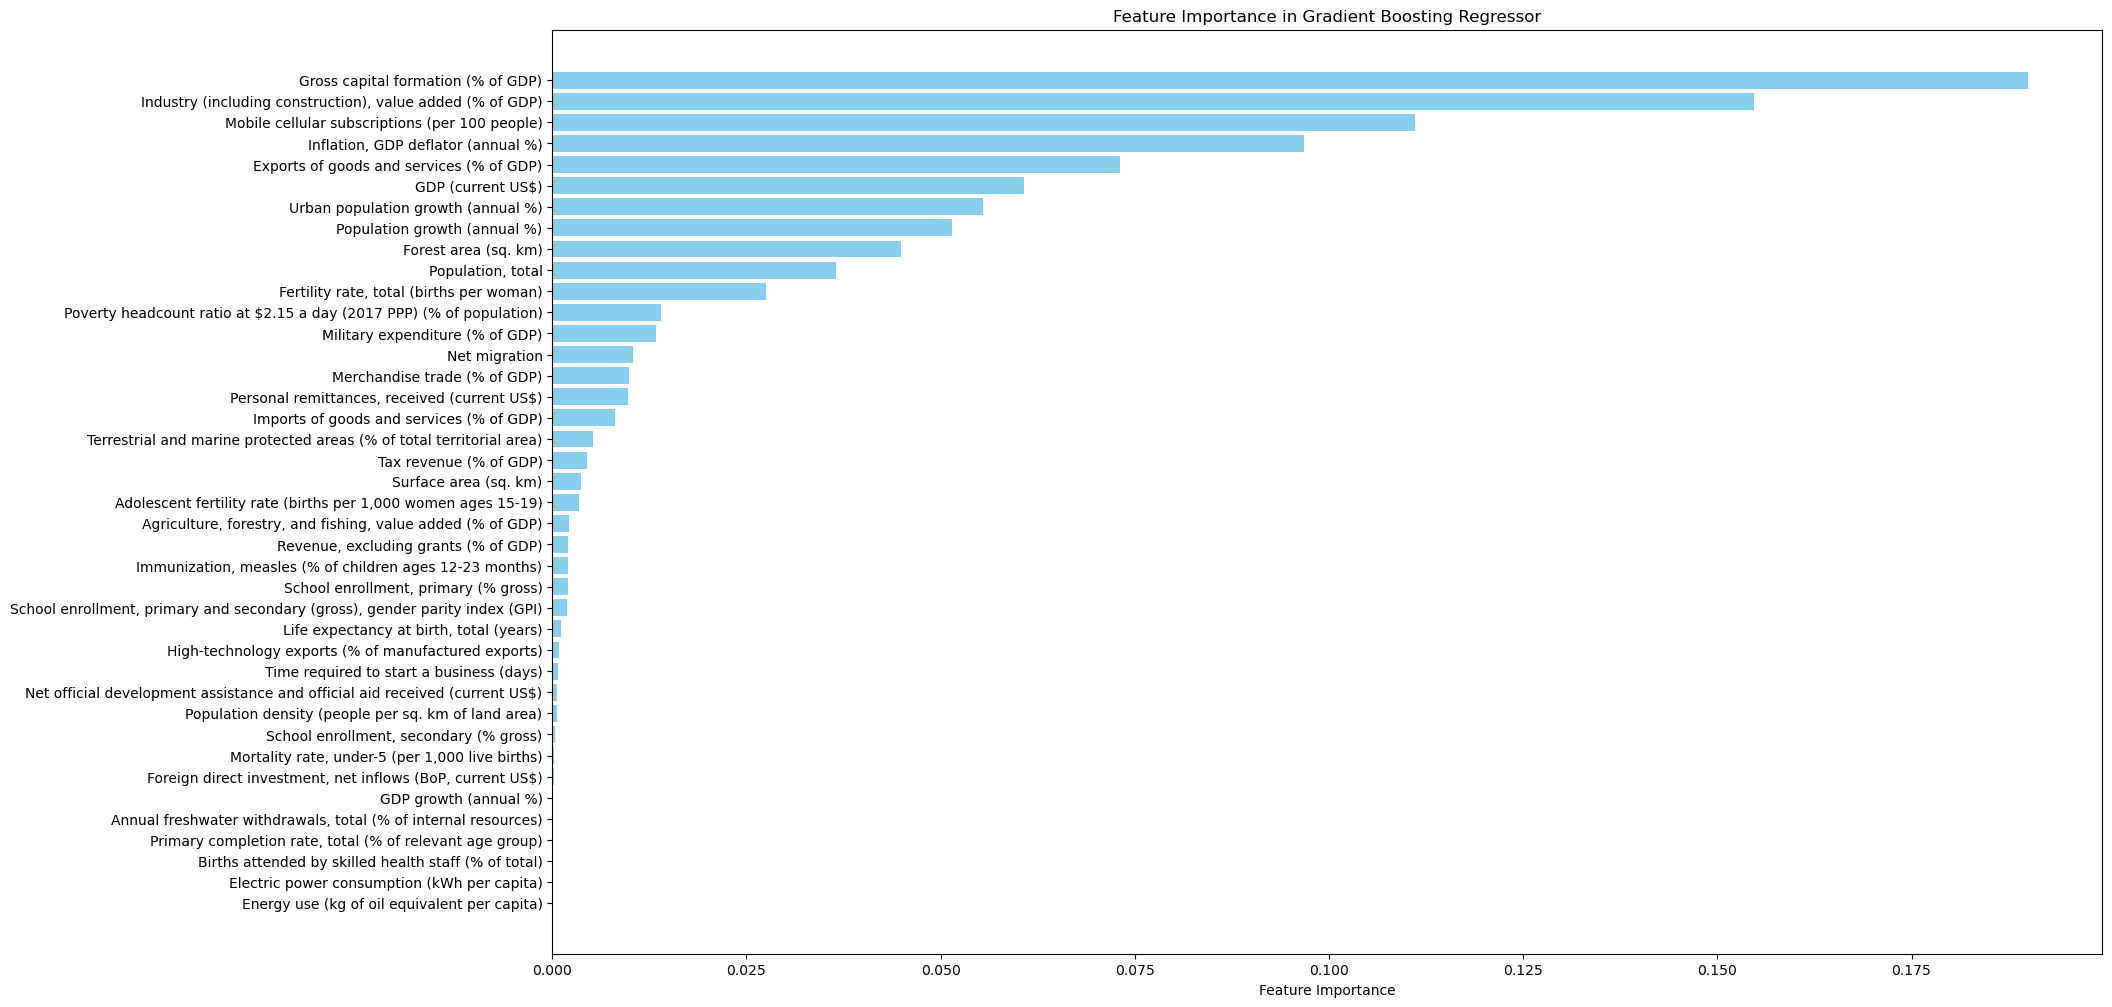

In [589]:
# I am going to look at the importance of each variable
importances_EU = gb_model_EU.feature_importances_

# Creating a new dataframe with the importances
feature_importance_df_EU = pd.DataFrame({
    "Feature": X_EU.columns,
    "Importance": importances_EU
})


feature_importance_df_EU = feature_importance_df_EU.sort_values(by = "Importance", ascending=False)

# Show the importances
print(feature_importance_df_EU)

# Plot the importances by order
plt.figure(figsize=(20, 12))
plt.barh(feature_importance_df_EU["Feature"], feature_importance_df_EU["Importance"], color = "skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting Regressor")
plt.gca().invert_yaxis() 
plt.show()

                                              Feature    Importance
32               School enrollment, primary (% gross)  1.707034e-01
13  High-technology exports (% of manufactured exp...  1.529439e-01
16  Industry (including construction), value added...  1.433424e-01
23                                      Net migration  1.154057e-01
28                                  Population, total  9.237001e-02
20                    Military expenditure (% of GDP)  6.639077e-02
15           Imports of goods and services (% of GDP)  6.411840e-02
25       Personal remittances, received (current US$)  4.483351e-02
34             School enrollment, secondary (% gross)  2.769942e-02
2   Annual freshwater withdrawals, total (% of int...  2.736464e-02
30  Primary completion rate, total (% of relevant ...  1.882018e-02
27                       Population growth (annual %)  1.179274e-02
9                                Forest area (sq. km)  9.931531e-03
7            Fertility rate, total (births per w

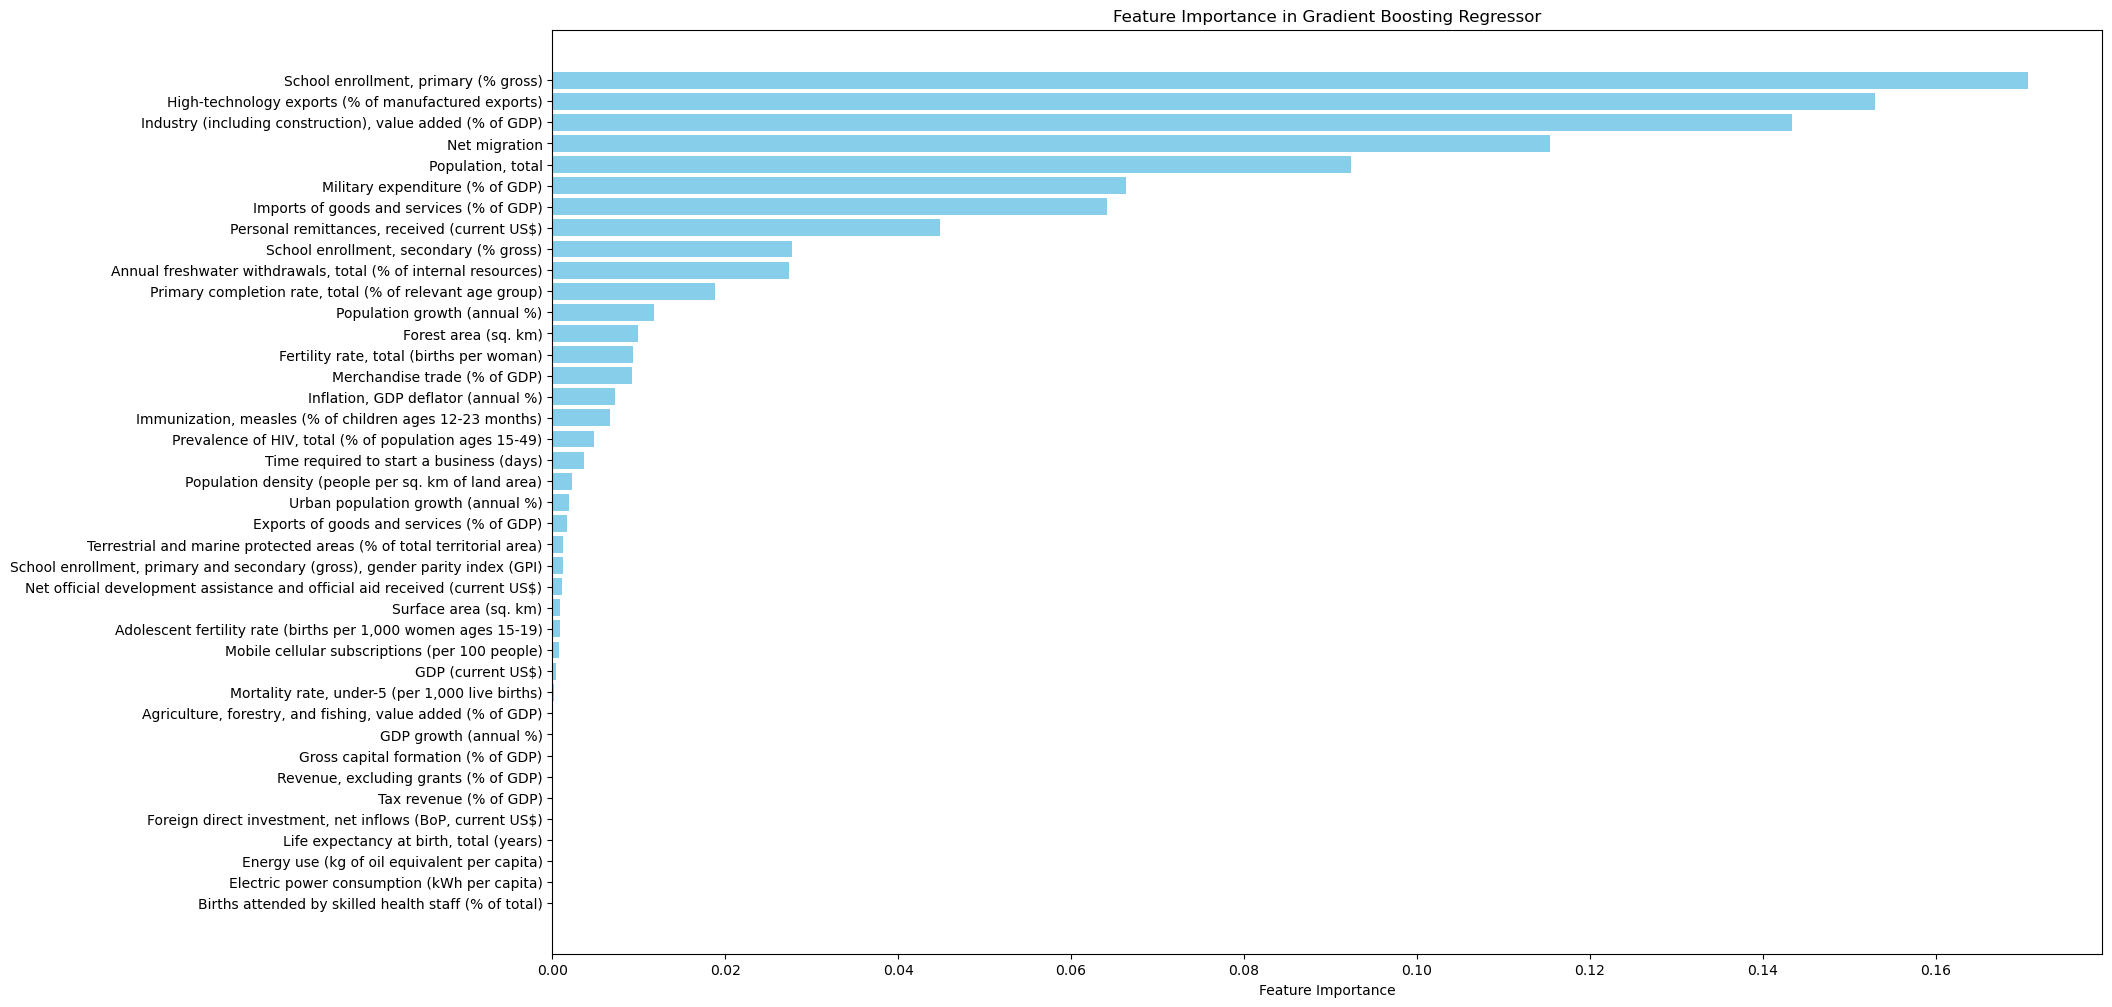

In [591]:
# I am going to look at the importance of each variable but this time of Latin America
importances_LA = gb_model_LA.feature_importances_

# Creating a new dataframe with the importances of Latin America
feature_importance_df_LA = pd.DataFrame({
    "Feature": X_LA.columns,
    "Importance": importances_LA
})


feature_importance_df_LA = feature_importance_df_LA.sort_values(by = "Importance", ascending=False)

# Show the importances
print(feature_importance_df_LA)

# Plot the importances by order
plt.figure(figsize=(20, 12))
plt.barh(feature_importance_df_LA["Feature"], feature_importance_df_LA["Importance"], color = "skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting Regressor")
plt.gca().invert_yaxis() 
plt.show()